In [49]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [27]:
df = pd.read_csv("Z:/20XW87-DATA-MINING-LAB/ps2/train.csv")

C:\Users\TEMP\AppData\Local\Temp\ipykernel_2148\2962695179.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Z:/20XW87-DATA-MINING-LAB/ps2/train.csv")


In [28]:
columns = df.columns.tolist()
req_cols = columns[:-3]

In [29]:
len(df['Age'])

381109

In [31]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,NaN,NaN,NaN
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,NaN,Average,38.822584
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,NaN,Average Premium,30564.389580
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,NaN,Count Male,206089.000000
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,NaN,Count Female,175020.000000


In [30]:
# 1
df['Age'].mean()

38.822583565331705

In [33]:
# 2
df['Annual_Premium'].mean()

30564.389581458323

In [34]:
# 3
df['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [37]:
# 4
male_age, male_count = 0, 0
female_age, female_count = 0, 0

for i in df.index:
    if df['Gender'][i]=="Male":
        male_count += 1
        male_age += df['Age'][i]
    if df['Gender'][i]=="Female":
        female_count += 1
        female_age += df['Age'][i]
        
print(male_age/male_count, female_age/female_count)

40.90309526466721 36.372745971888925


In [45]:
# 5
vi,vi_prem_sum = 0, 0
nvi, nvi_prem_sum = 0, 0

for i in df.index:
    if df['Previously_Insured'][i]==1:
        vi += 1
        vi_prem_sum += df['Annual_Premium'][i]
    if df['Previously_Insured'][i]==0:
        nvi += 1
        nvi_prem_sum += df['Annual_Premium'][i]
        
print(vi_prem_sum/vi, nvi_prem_sum/nvi)

30644.289197608632 30496.81576028787


In [42]:
# 6
dl,dl_prem_sum = 0, 0
ndl, ndl_prem_sum = 0, 0

for i in df.index:
    if df['Driving_License'][i]==1:
        dl += 1
        dl_prem_sum += df['Annual_Premium'][i]
    if df['Driving_License'][i]==0:
        ndl += 1
        ndl_prem_sum += df['Annual_Premium'][i]
        
print(dl_prem_sum/dl, ndl_prem_sum/ndl)

30554.919365653688 34999.72783251232


In [48]:
# 7
mean_vprem = vi_prem_sum/vi
mean_nvprem = nvi_prem_sum/nvi
num_mean_v = 0
num_mean_nv = 0

for i in df.index:
    if df['Previously_Insured'][i]==1:
        num_mean_v += (df['Annual_Premium'][i]-mean_vprem)**2
    if df['Previously_Insured'][i]==0:
        num_mean_nv += (df['Annual_Premium'][i]-mean_nvprem)**2
        
var_v = num_mean_v/vi
var_nv = num_mean_nv/nvi
print(var_v, var_nv)

250285266.5964264 335191362.8661649


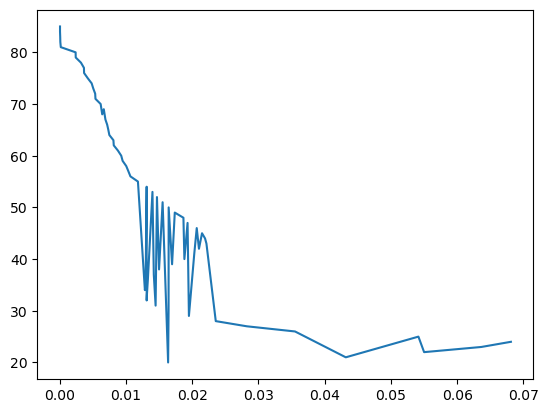

In [76]:
# df.loc[df['Gender']=="Male",'Age'].value_counts()
l = df['Age'].value_counts(normalize=True).reset_index()
plt.plot(l['proportion'],l['Age'])
plt.show()
# tc = df['Age'].count()
# print(l)